# 多项式特征解决非线性问题

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

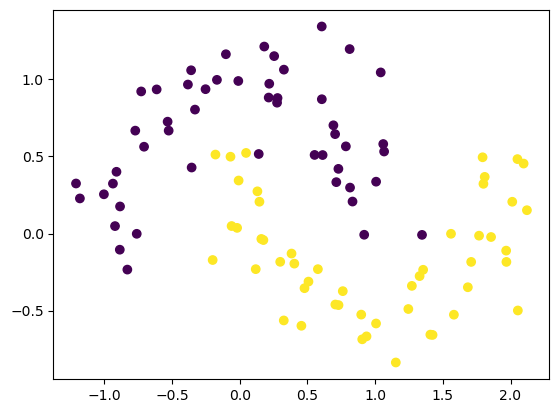

In [6]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=100,noise=0.2,random_state=0)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [7]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()
lsvc.fit(x,y)

LinearSVC()

In [9]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max=X[:,0].min()-1,X[:,0].max()+1
    axis_x2_min,axis_x2_max=X[:,1].min()-1,X[:,1].max()+1
    x1,x2=np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    z=clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z=z.reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])
    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

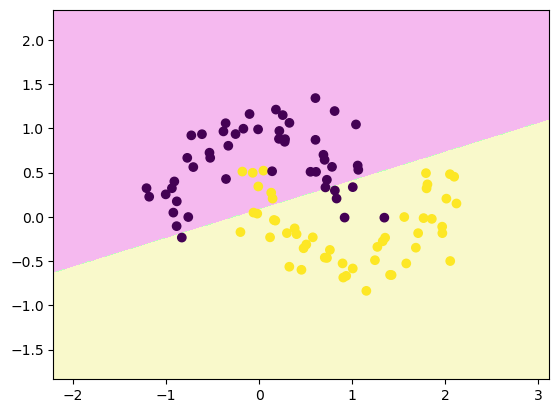

In [11]:
decision_boundary_plot(x,y,lsvc)

In [12]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
poly_svc=Pipeline([
    ("poly",PolynomialFeatures(degree=3)),
    ("std_scaler",StandardScaler()),
    ("linearSVC",LinearSVC())
])

In [16]:
poly_svc.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

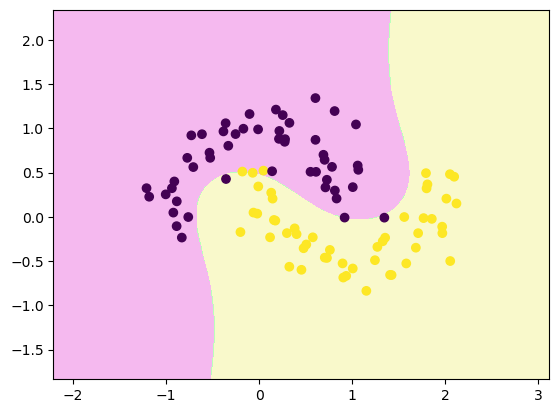

In [17]:
decision_boundary_plot(x,y,poly_svc)

# 核函数解决非线性问题

In [18]:
from sklearn.svm import SV

In [19]:
poly_svc=Pipeline([
    ("std_scaler",StandardScaler()),
    ("polySVC",SVC(kernel='poly',degree=3))
])
poly_svc.fit(x,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('polySVC', SVC(kernel='poly'))])

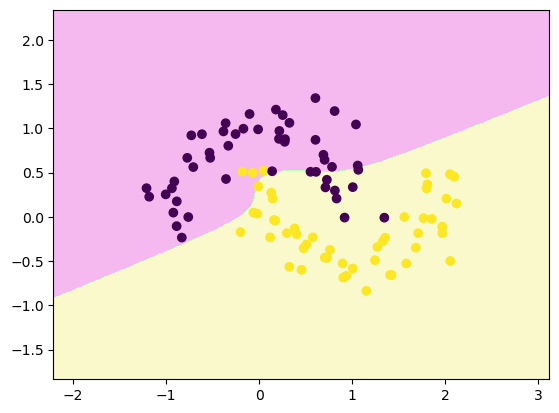

In [20]:
decision_boundary_plot(x,y,poly_svc)

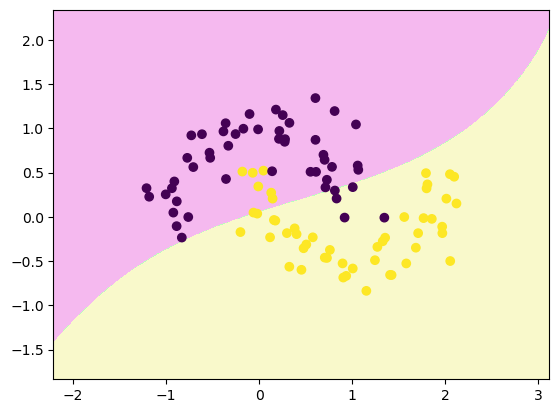

In [22]:
rbf_svc=Pipeline([
    ("std_scaler",StandardScaler()),
    ("rbfSVC",SVC(kernel='rbf',gamma=0.1))#gamma越大高斯函数越陡峭
])
rbf_svc.fit(x,y)
decision_boundary_plot(x,y,rbf_svc)#欠拟合了

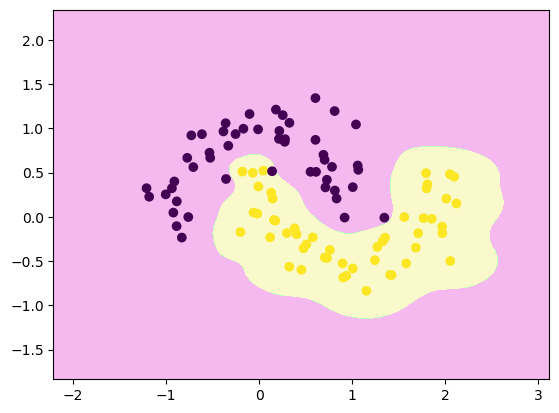

In [23]:
rbf_svc=Pipeline([
    ("std_scaler",StandardScaler()),
    ("rbfSVC",SVC(kernel='rbf',gamma=10))#gamma越大高斯函数越陡峭
])
rbf_svc.fit(x,y)
decision_boundary_plot(x,y,rbf_svc)

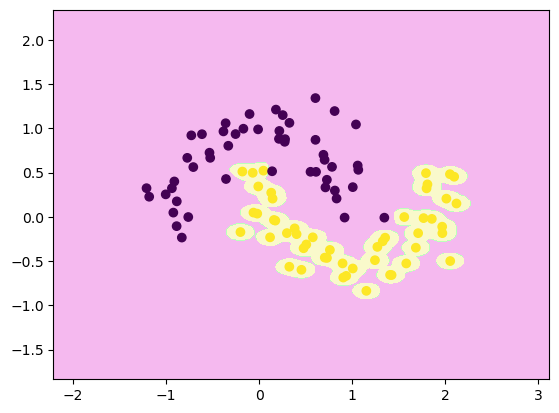

In [25]:
rbf_svc=Pipeline([
    ("std_scaler",StandardScaler()),
    ("rbfSVC",SVC(kernel='rbf',gamma=100))#gamma越大高斯函数越陡峭
])
rbf_svc.fit(x,y)
decision_boundary_plot(x,y,rbf_svc)#过拟合了